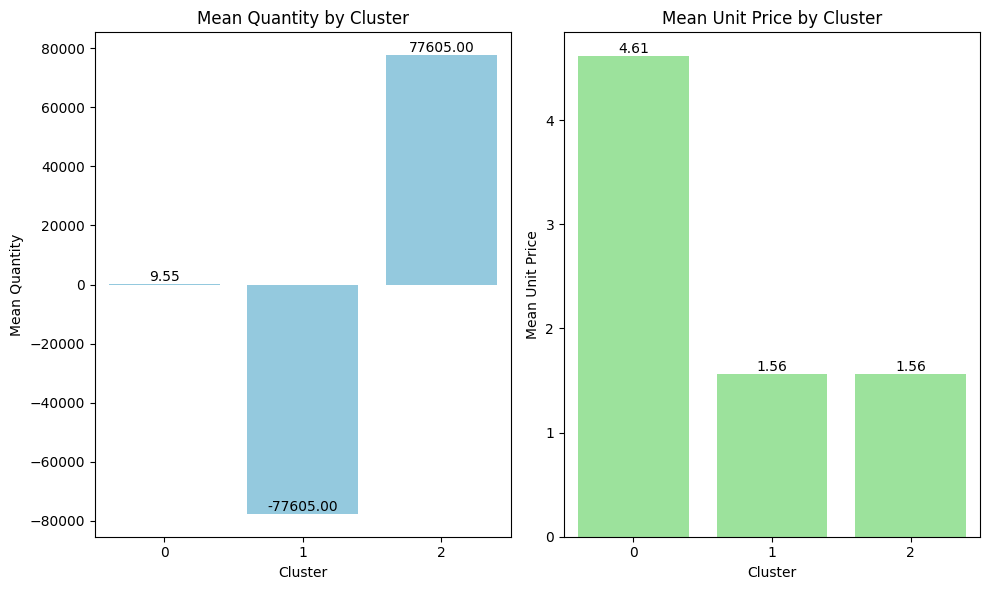

In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('online_retail_data.csv')

# Preprocessing - For simplicity, assume preprocessing has been done

# Feature selection
X = data[['Quantity', 'UnitPrice']]  # Select relevant features

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
data['Cluster'] = kmeans.labels_

# Calculate mean Quantity and UnitPrice for each cluster
cluster_means = data.groupby('Cluster').agg({'Quantity': 'mean', 'UnitPrice': 'mean'}).reset_index()

# Visualize mean Quantity and UnitPrice by cluster
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.barplot(x='Cluster', y='Quantity', data=cluster_means, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Mean Quantity')
plt.title('Mean Quantity by Cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Add value labels on bars
for index, row in cluster_means.iterrows():
    plt.text(row.name, row['Quantity'], '{:.2f}'.format(row['Quantity']), ha='center', va='bottom')

plt.subplot(2, 1, 2)
sns.barplot(x='Cluster', y='UnitPrice', data=cluster_means, color='lightgreen')
plt.xlabel('Cluster')
plt.ylabel('Mean Unit Price')
plt.title('Mean Unit Price by Cluster')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Add value labels on bars
for index, row in cluster_means.iterrows():
    plt.text(row.name, row['UnitPrice'], '{:.2f}'.format(row['UnitPrice']), ha='center', va='bottom')

plt.tight_layout()
plt.show()

